In [1]:
#Import Dataset
#==============================================
import pandas as pd
URL = "../data/processed/healthcare-dataset-stroke-data-T.csv"
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,1,1,228.69,36.6,2,1
1,2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,4,1665,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,5,56669,1,81.0,0,0,1,1,1,186.21,29.0,2,1


In [2]:
# Split the data into features (X) and labels (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

In [3]:
# Model initiation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [4]:
# Initialize a StratifiedKFold object
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [5]:
# Initialize lists to store the evaluation metrics
accuracies = []
precisions = []
recalls = []
f1s = []

In [7]:
# Loop through the folds in the StratifiedKFold object
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the KNN Classifier on the training data
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, y_train)

    # Predict the labels on the test data
    y_pred = knn_clf.predict(X_test)

    # Evaluate the performance of the KNN Classifier on the test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the evaluation metrics to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

In [8]:
# Compute the average of the evaluation metrics across all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1s) / len(f1s)

In [14]:
# Print the metrics as percentages
print(f'Accuracy: {acc * 100:.2f}%')
print(f'Precision: {prec * 100:.2f}%')
print(f'Recall: {rec * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

NameError: name 'acc' is not defined

In [12]:
# Create a scatter plot of the test data, using different colors for positive and negative heart strikes
import matplotlib.pyplot as plt
import numpy as np
positive_samples = X_test[y_test == 1]
negative_samples = X_test[y_test == 0]

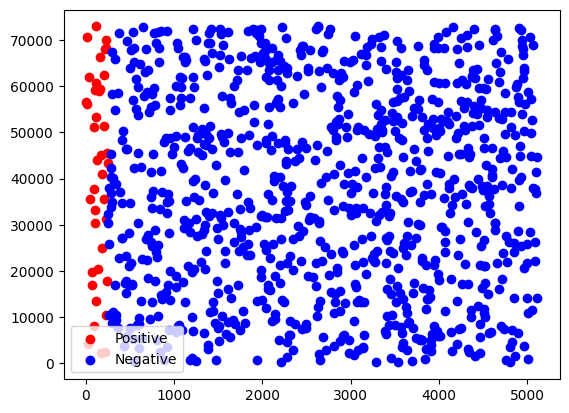

In [13]:
plt.scatter(positive_samples.iloc[:, 0], positive_samples.iloc[:, 1], c='red', label='Positive')
plt.scatter(negative_samples.iloc[:, 0], negative_samples.iloc[:, 1], c='blue', label='Negative')
plt.legend()
plt.show()